<a href="https://colab.research.google.com/github/shivamkkas/prediction_system/blob/main/Machine_Learning_Internship_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task1: House Price Prediction**

In [ ]:
import pandas as pd

In [ ]:
# loading Dataset
data = pd.read_csv("/content/homeprices.csv")
data.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


from matplotlib import pyplot as plt
_df_0['area'].plot(kind='hist', bins=20, title='area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='area', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['area']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'area'}, axis=1)
              .sort_values('area', ascending=True))
  xs = counted['area']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('area', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('area')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['price']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'price'}, axis=1)
              .sort_values('price', ascending=True))
  xs = counted['price']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('price')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['area'].plot(kind='line', figsize=(8, 4), title='area')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#filtering data based upon requirement to predict price
x = pd.get_dummies(data)

In [ ]:
x.sample(10)

,area,price,town_monroe township,town_robinsville,town_west windsor
7,3300,650000,0,0,1
9,2600,575000,0,1,0
3,3600,680000,1,0,0
6,2800,615000,0,0,1
1,3000,565000,1,0,0
0,2600,550000,1,0,0
2,3200,610000,1,0,0
5,2600,585000,0,0,1
8,3600,710000,0,0,1
11,3100,620000,0,1,0


In [ ]:
y = x.drop(['price','town_west windsor'],axis='columns')
y.sample(10)

,area,town_monroe township,town_robinsville
0,2600,1,0
7,3300,0,0
11,3100,0,1
3,3600,1,0
5,2600,0,0
2,3200,1,0
12,3600,0,1
9,2600,0,1
6,2800,0,0
4,4000,1,0


In [ ]:
z = data.price

In [ ]:
#spliting dataset into training and testing phase
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(y,z,test_size=0.1)

In [ ]:
#Initialising model and fit it with training data
from sklearn.linear_model import Lasso
model =Lasso(alpha=0.1)
model.fit(x_train,y_train)

Lasso(alpha=0.1)

In [ ]:
model.score(x_test,y_test)

0.9805762383381013

In [ ]:
#model Predict Prices for test data

model.predict(x_test)

array([702448.08268424, 575267.75037108])

In [ ]:
y_test

8    710000
5    585000
Name: price, dtype: int64

In [ ]:
model.predict([[4000,1,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([707571.43438867])

#**Task2 : Movie Recommendations**

In [ ]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

In [ ]:
# Load Movies and their ratings dataset,Ensure that dataset should be copyright
movies = pd.read_csv(r"/content/movies.csv")
ratings = pd.read_csv(r"/content/ratings.csv")
df = pd.merge(ratings, movies, on='movieId') # merging both data set
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


from matplotlib import pyplot as plt
_df_7['userId'].plot(kind='hist', bins=20, title='userId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['timestamp'].plot(kind='hist', bins=20, title='timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='userId', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='rating', y='timestamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['userId']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('userId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('userId')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['userId']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'userId'}, axis=1)
              .sort_values('userId', ascending=True))
  xs = counted['userId']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('userId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('userId')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['movieId']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('movieId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('movieId')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['movieId']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'movieId'}, axis=1)
              .sort_values('movieId', ascending=True))
  xs = counted['movieId']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('movieId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('movieId')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_16['userId'].plot(kind='line', figsize=(8, 4), title='userId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['timestamp'].plot(kind='line', figsize=(8, 4), title='timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Creating a  user-item matrix(row for user and column for movies ratings)
user_movie_ratings = df.pivot_table(index='userId', columns='title', values='rating')
user_movie_ratings = user_movie_ratings.fillna(0)# fill nil area with 0 (assume thar their is no ratings)

# Transpose user-item matrix for item-item collaborative filtering
movie_similarity = cosine_similarity(user_movie_ratings.T)

# Convert similarity matrix into a DataFrame
movie_similarity_df = pd.DataFrame(movie_similarity, index=user_movie_ratings.columns, columns=user_movie_ratings.columns)

In [ ]:
# Main function to get movie recommendations for a given movie
def get_movie_recommendations(movie_title, user_ratings):
    similar_scores = movie_similarity_df[movie_title] * (user_ratings - 2.5)
    similar_movies = similar_scores.sort_values(ascending=False)
    return similar_movies




In [ ]:
# Main function to generate movie recommendations for a user
def generate_recommendations(user_ratings):
    recommendations = pd.Series()
    for movie, rating in user_ratings.items():
        similar_scores = movie_similarity_df[movie] * (rating - 2.5)
        recommendations = recommendations.add(similar_scores, fill_value=0)

    return recommendations.sort_values(ascending=False)



In [ ]:
# Example: Generate movie recommendations for a user
user_ratings = {'Inception (2010)': 5.0,'Dark Knight, The (2008)':4.0, 'Toy Story (1995)': 3.0}
recommendations = generate_recommendations(user_ratings)
recommendations.head(5) # how many movies to do you want to recommand.

<ipython-input-135-576c1137ac68>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  recommendations = pd.Series()


title
Inception (2010)                 3.752878
Dark Knight, The (2008)          3.501814
Dark Knight Rises, The (2012)    2.675071
Fight Club (1999)                2.613899
Iron Man (2008)                  2.612465
dtype: float64

In [ ]:
# Example: Generate movie recommendations for a user
user_ratings = {'Batman Begins (2005)': 5.0,'Dark Knight, The (2008)':4.0,'Lord of the Rings: The Fellowship of the Ring, The (2001)':2.0,'Matrix, The (1999)': 3.0}
recommendations = generate_recommendations(user_ratings)
recommendations.head(20)

<ipython-input-135-576c1137ac68>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  recommendations = pd.Series()


title
Batman Begins (2005)                                             3.433351
Dark Knight, The (2008)                                          3.118419
Iron Man (2008)                                                  2.491880
Kill Bill: Vol. 1 (2003)                                         2.405405
Departed, The (2006)                                             2.394010
Pirates of the Caribbean: The Curse of the Black Pearl (2003)    2.384616
Lord of the Rings: The Return of the King, The (2003)            2.378204
Inception (2010)                                                 2.377751
Kill Bill: Vol. 2 (2004)                                         2.354062
Dark Knight Rises, The (2012)                                    2.344534
V for Vendetta (2006)                                            2.339436
Prestige, The (2006)                                             2.331146
Sin City (2005)                                                  2.309107
Matrix, The (1999)              

#**Task3 : Iris Classification**

In [ ]:
#importing Libraries and loading datsets
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# Loading dataset into datframe
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [ ]:
# Fitering data
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


from matplotlib import pyplot as plt
_df_19['sepal length (cm)'].plot(kind='hist', bins=20, title='sepal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['sepal width (cm)'].plot(kind='hist', bins=20, title='sepal width (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['petal length (cm)'].plot(kind='hist', bins=20, title='petal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='sepal width (cm)', y='petal length (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['petal width (cm)']
  ys = series['sepal length (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('sepal length (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['petal width (cm)']
  ys = series['sepal width (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('sepal width (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['petal width (cm)']
  ys = series['petal length (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('petal length (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['petal width (cm)']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'petal width (cm)'}, axis=1)
              .sort_values('petal width (cm)', ascending=True))
  xs = counted['petal width (cm)']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_28['sepal length (cm)'].plot(kind='line', figsize=(8, 4), title='sepal length (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['sepal width (cm)'].plot(kind='line', figsize=(8, 4), title='sepal width (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['petal length (cm)'].plot(kind='line', figsize=(8, 4), title='petal length (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# partitioning data
df0 = df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
55,5.7,2.8,4.5,1.3,1,versicolor
56,6.3,3.3,4.7,1.6,1,versicolor
57,4.9,2.4,3.3,1.0,1,versicolor
58,6.6,2.9,4.6,1.3,1,versicolor
59,5.2,2.7,3.9,1.4,1,versicolor


from matplotlib import pyplot as plt
df1['sepal length (cm)'].plot(kind='hist', bins=20, title='sepal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1['sepal width (cm)'].plot(kind='hist', bins=20, title='sepal width (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1['petal length (cm)'].plot(kind='hist', bins=20, title='petal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1['petal width (cm)'].plot(kind='hist', bins=20, title='petal width (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='sepal width (cm)', y='petal length (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['sepal length (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df1.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('sepal length (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['sepal width (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df1.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('sepal width (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['petal length (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df1.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('petal length (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['petal width (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df1.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('petal width (cm)')

from matplotlib import pyplot as plt
df1['sepal length (cm)'].plot(kind='line', figsize=(8, 4), title='sepal length (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df1['sepal width (cm)'].plot(kind='line', figsize=(8, 4), title='sepal width (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df1['petal length (cm)'].plot(kind='line', figsize=(8, 4), title='petal length (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df1['petal width (cm)'].plot(kind='line', figsize=(8, 4), title='petal width (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

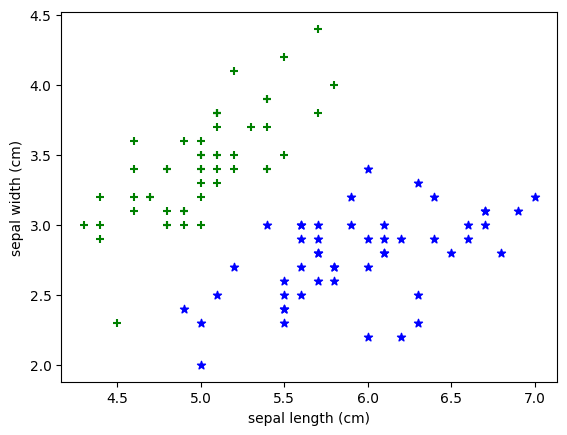

In [ ]:
# Plotting graph OR Data Visualization
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='*')

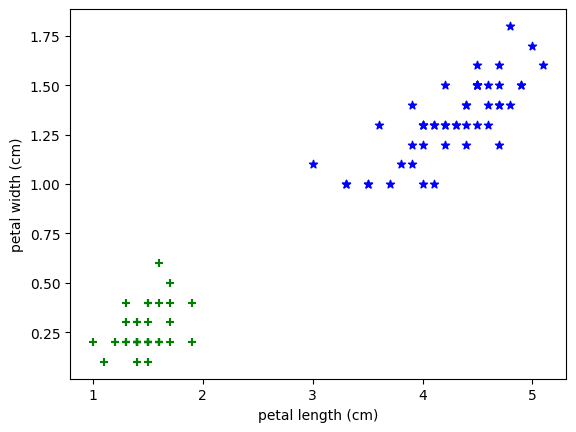

In [ ]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='*')

In [ ]:
# Splitting datasets for input and ouput
from sklearn.model_selection import train_test_split
x = df.drop(['target','flower_name'],axis='columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


from matplotlib import pyplot as plt
_df_31['sepal length (cm)'].plot(kind='hist', bins=20, title='sepal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['sepal width (cm)'].plot(kind='hist', bins=20, title='sepal width (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['petal length (cm)'].plot(kind='hist', bins=20, title='petal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='sepal width (cm)', y='petal length (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['petal width (cm)']
  ys = series['sepal length (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_36.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('sepal length (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['petal width (cm)']
  ys = series['sepal width (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_37.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('sepal width (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['petal width (cm)']
  ys = series['petal length (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_38.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('petal length (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['petal width (cm)']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'petal width (cm)'}, axis=1)
              .sort_values('petal width (cm)', ascending=True))
  xs = counted['petal width (cm)']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_40['sepal length (cm)'].plot(kind='line', figsize=(8, 4), title='sepal length (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_41['sepal width (cm)'].plot(kind='line', figsize=(8, 4), title='sepal width (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_42['petal length (cm)'].plot(kind='line', figsize=(8, 4), title='petal length (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
y= df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
# Splitting dataset for Training and testing
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [ ]:
len(x_train)

120

In [ ]:
# loading model and fit that model
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [ ]:
# Testing accuracy of model
model.score(x_test,y_test)

0.9666666666666667

In [ ]:
model.predict(x_test)

array([0, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 1, 2, 0,
       1, 2, 0, 1, 2, 2, 1, 1])

In [ ]:
y_test

46     0
100    2
138    2
14     0
60     1
106    2
49     0
76     1
55     1
1      0
0      0
98     1
29     0
86     1
17     0
81     1
131    2
125    2
104    2
79     1
133    2
38     0
74     1
103    2
23     0
75     1
143    2
141    2
58     1
54     1
Name: target, dtype: int64

In [ ]:
y_predicted=model.predict(x_test)

In [ ]:
# creating confusion metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  9]])

<Axes: >

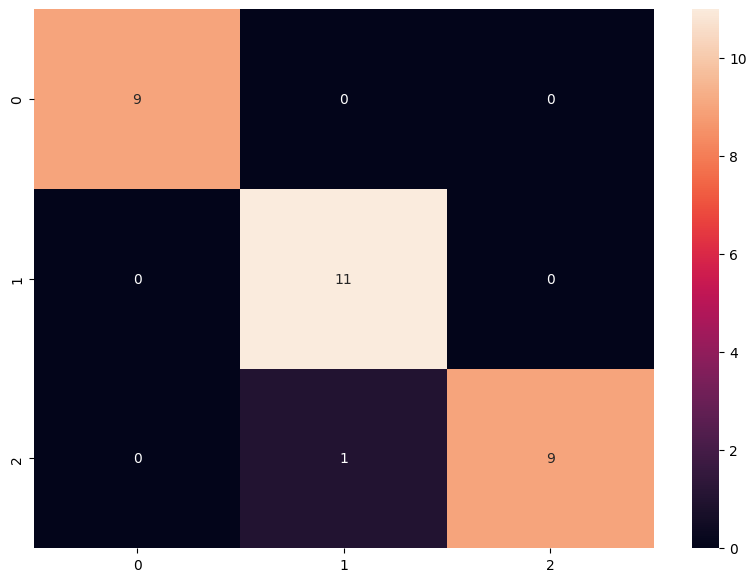

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,7))
plt.xlabel('Truth')
plt.ylabel("Predicted")
sns.heatmap(cm,annot=True)

In [ ]:
# now predict the data to flower name
data = {0:'Setosa',1:'Versicolor',2:'Virginica'}
predict= model.predict(x_test)
predicted = []
correct = []
for i in predict:
  predicted.append(data.get(i))
for j in y_test:
  correct.append(j)

dt = {"Predicted": predicted,"True":correct}
dff = pd.DataFrame(dt)
dff

,Predicted,True
0,Setosa,0
1,Virginica,2
2,Virginica,2
3,Setosa,0
4,Versicolor,1
5,Versicolor,2
6,Setosa,0
7,Versicolor,1
8,Versicolor,1
9,Setosa,0


from matplotlib import pyplot as plt
dff['True'].plot(kind='hist', bins=20, title='True')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
dff.groupby('Predicted').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dff['True'].plot(kind='line', figsize=(8, 4), title='True')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dff['Predicted'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dff, x='True', y='Predicted', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)